In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from scipy import interpolate
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_log_error

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

from pandas.tseries.offsets import MonthEnd
import matplotlib.dates as mdates


from pandas import datetime
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import STL
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import STL
import statsmodels.tsa.api as smt

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
!dir

 Volume in drive C is Acer
 Volume Serial Number is BCC6-CC82

 Directory of C:\Users\user\Data-Science\EventLomba\BRI Hackthon\Cash-Ratio-Optimization

26/02/2021  21:11    <DIR>          .
26/02/2021  21:11    <DIR>          ..
17/02/2021  16:58    <DIR>          .ipynb_checkpoints
10/02/2021  13:37         5.634.918 1. analysis dasar.ipynb
18/02/2021  11:56         4.719.801 10. .ipynb
11/02/2021  13:27               867 11. Prophet.ipynb
17/02/2021  17:44         4.277.635 12. Best Validation.ipynb
12/12/2020  10:30         3.807.137 2. inout_predict.ipynb
24/12/2020  06:42         4.222.363 3. each_in_out_predict(copy).ipynb
19/12/2020  15:01         1.137.591 3. each_in_out_predict.ipynb
15/12/2020  08:25         4.555.743 4. Analisis Trend.ipynb
24/12/2020  07:02         4.627.871 5. each_in_out_predict_grid_seasonal.ipynb
22/01/2021  10:03           287.404 6. just check .ipynb
26/02/2021  21:11           106.804 7. Best .ipynb
23/02/2021  22:41         4.378.357 8. Best modif 

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train['date'] = pd.to_datetime(train['periode'])
train = train.set_index(['date'])

train = train.resample('D').mean()
train['periode'] = train.index


import numpy as np
from scipy import interpolate

def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B



# fill nan in out cash
train['cash_in_echannel'] = fill_nan(train['cash_in_echannel'].values)
train['cash_out_echannel'] = fill_nan(train['cash_out_echannel'].values)

train['cash_in_kantor'] = fill_nan(train['cash_in_kantor'].values)
train['cash_out_kantor'] = fill_nan(train['cash_out_kantor'].values)




# Ekplorasi Data Analisis

In [4]:
# Just Show 

import plotly.graph_objects as go

x = train.index

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=train.cash_in_kantor,
    name = '<b>Cash In Kantor</b> ', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.add_trace(go.Scatter(
    x=x,
    y= train.cash_out_kantor,
    name='<b>Cash Out Kantor</b>',
))

fig.update_layout(
    title="Chart Cash In Kantor and Cash Out Kantor",
    xaxis_title="Date",
    yaxis_title="Cash",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [5]:
# Just Show 

import plotly.graph_objects as go

x = train.index

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=train.cash_in_echannel,
    name = '<b>Cash In Echannel</b> ', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.add_trace(go.Scatter(
    x=x,
    y= train.cash_out_echannel,
    name='<b>Cash Out Echannel</b>',
))

fig.update_layout(
    title="Chart Cash In Echannel and Cash Out Echannel",
    xaxis_title="Date",
    yaxis_title="Cash",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

In [6]:
def plot_line(x, y, titles):
    fig = go.Figure([go.Scatter(x=x, y=y)])
    fig.update_layout(
        title=titles,
        xaxis_title="Date",
        yaxis_title="Cash" ,
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        )
    )

    fig.show()
    
    

In [7]:
plot_line(train.index , train.rata_dpk_mingguan, 'Chart Rata-rata DPK Mingguan')

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Chart Giro", "Chart Deposito", "Chart Kewajiban lain", "Chart Tabungan")
)

# Add traces
fig.add_trace(go.Scatter(x=train.index , y=train.giro), row=1, col=1)
fig.add_trace(go.Scatter(x=train.index , y=train.deposito), row=1, col=2)
fig.add_trace(go.Scatter(x=train.index , y=train.kewajiban_lain), row=2, col=1)
fig.add_trace(go.Scatter(x=train.index , y=train.tabungan), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date",  row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Giro", row=1, col=1)
fig.update_yaxes(title_text="Deposito",  row=1, col=2)
fig.update_yaxes(title_text="Kewajiban Lain",  row=2, col=1)
fig.update_yaxes(title_text="Tabungan", row=2, col=2)

# Update title and height
#fig.update_layout(title_text="Customizing Subplot Axes", height=700)

fig.show()

## Decompose Time Series

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.


In [9]:
import seaborn as sns

In [10]:
def decompose(df, col):
    stl = STL(df[col])
    result = stl.fit()
    fig, ax = plt.subplots(2, 2, figsize=(18,6))
    colors = sns.color_palette('deep')
    ax[0,0].plot(df[col], label='Original Series', color=colors[0])
    ax[0,0].plot(result.trend + result.seasonal, label='trend + seasonality', color='red')
    ax[0,0].legend()
    ax[0,1].plot(result.trend, color=colors[2]); ax[0,1].set_title('Trend')
    ax[1,0].plot(result.seasonal, color=colors[4]); ax[1,0].set_title('Seasonality')
    mu, std = np.mean(result.resid), np.std(result.resid)
    up, dw = mu + 3*std, mu - 3*std
    ax[1,1].plot(result.resid, color=colors[1]); ax[1,1].set_title('Residual')
    ax[1,1].fill_between(train.index, dw, up, color='g', alpha=0.1)
    for i in range(2): 
        for j in range(2): 
            ax[i,j].grid()
   
    plt.tight_layout()
    

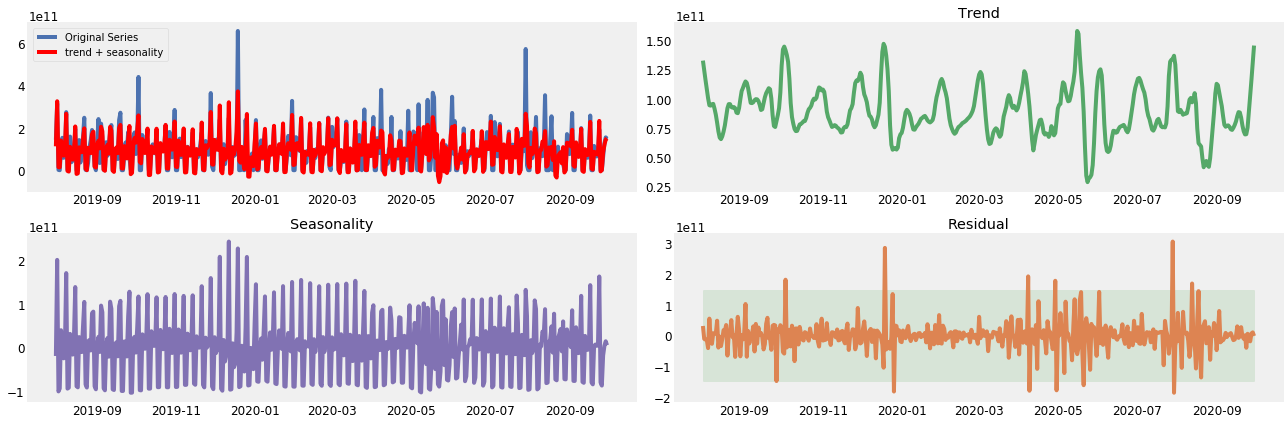

In [11]:
decompose(train, 'cash_in_kantor')

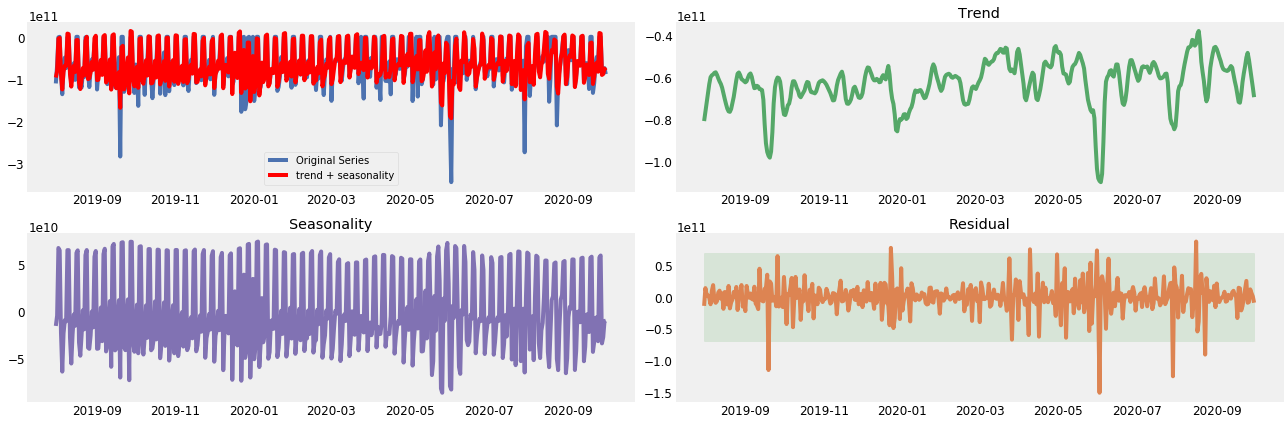

In [12]:
decompose(train, 'cash_out_kantor')

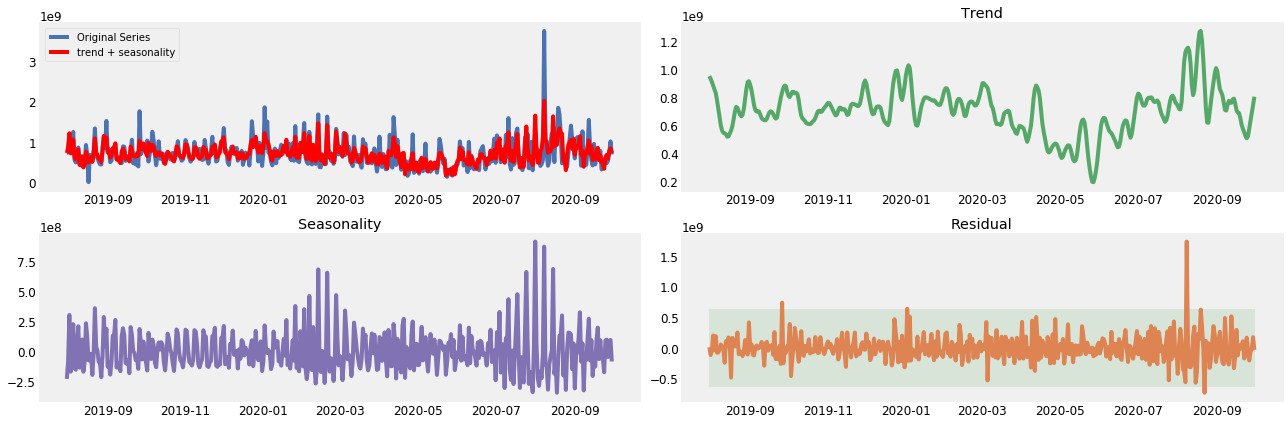

In [13]:
decompose(train, 'cash_in_echannel')

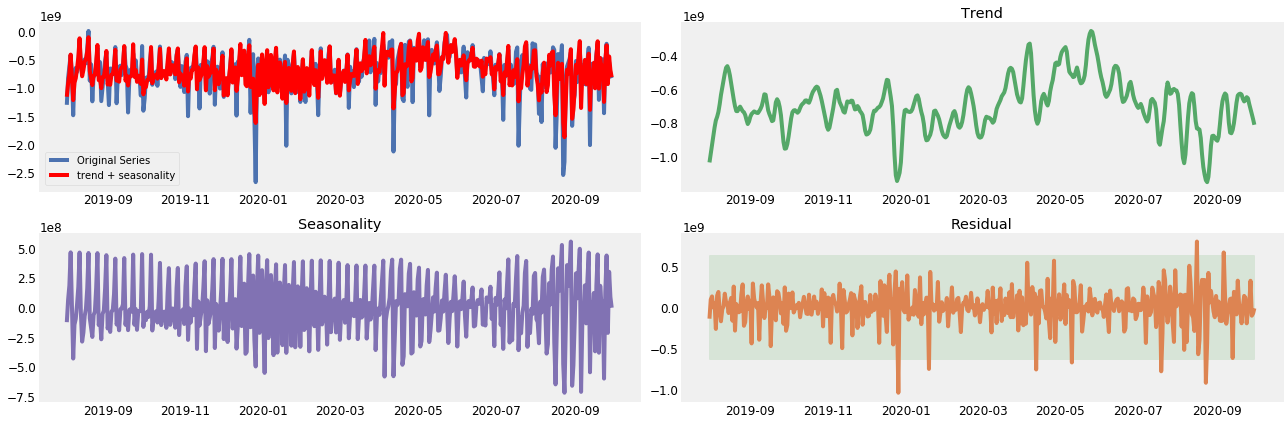

In [14]:
decompose(train, 'cash_out_echannel')

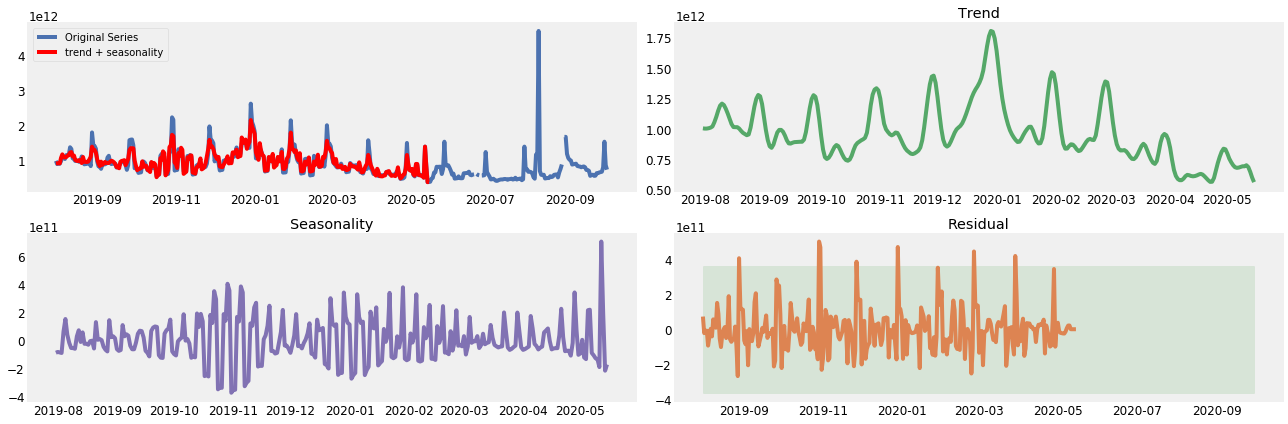

In [15]:
decompose(train, 'giro')

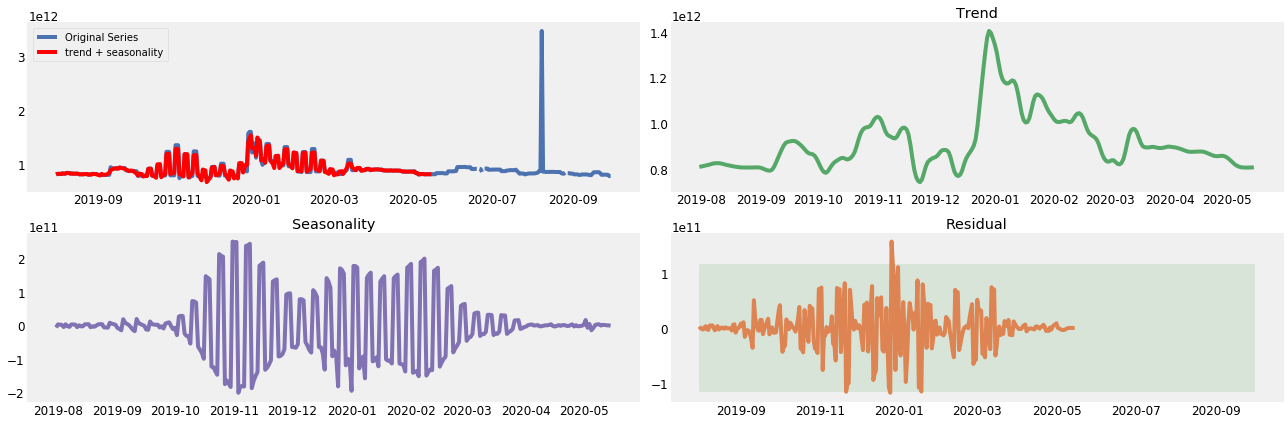

In [16]:
decompose(train, 'deposito')

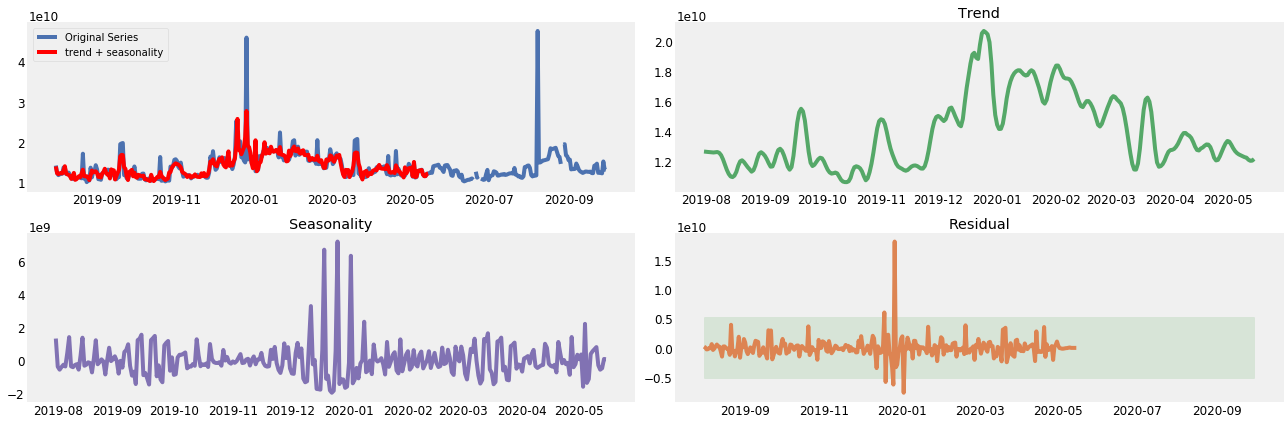

In [17]:
decompose(train, 'kewajiban_lain')

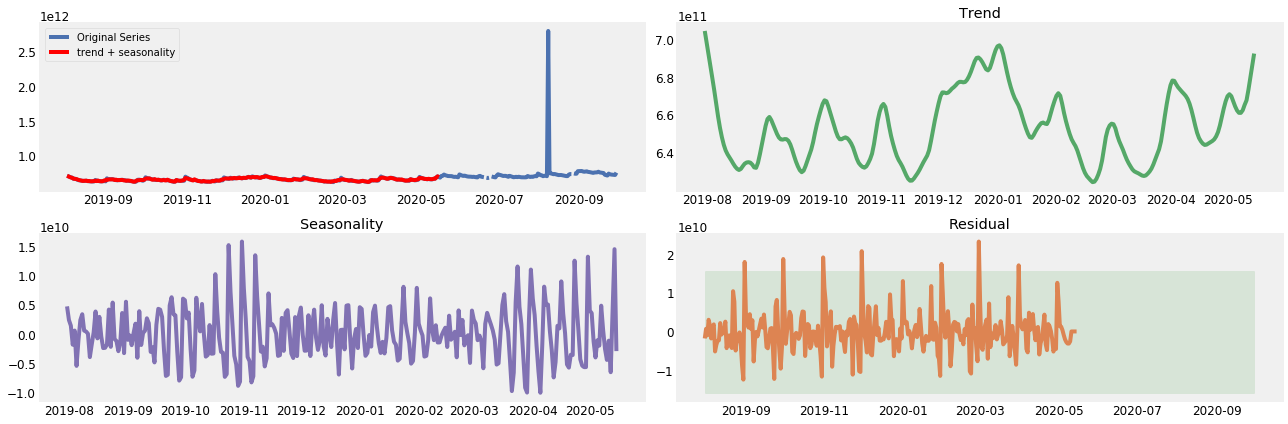

In [18]:
decompose(train, 'tabungan')

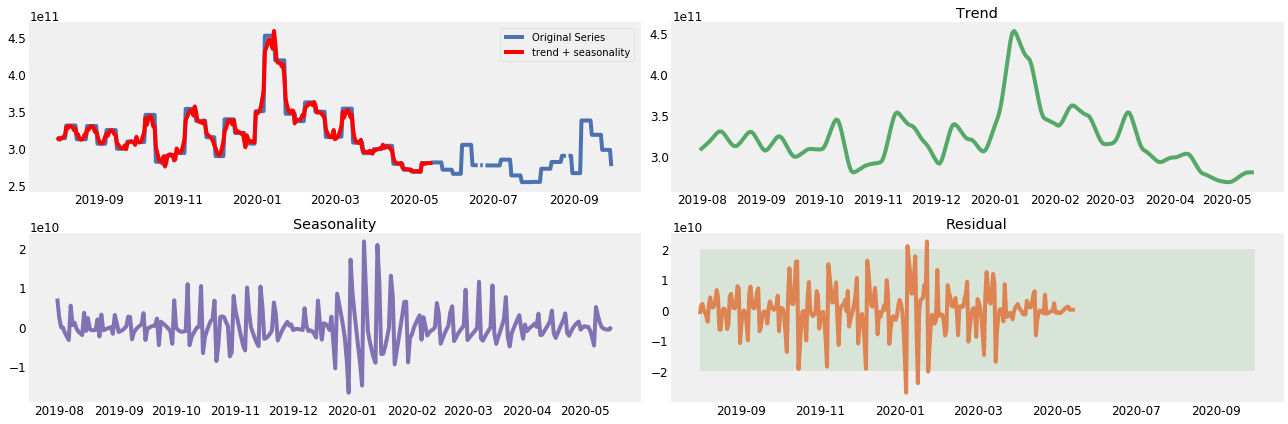

In [19]:
decompose(train, 'rata_dpk_mingguan')

## Cek Correlation

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

- **Positive Correlation** is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.
- **Negative Correlation** is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. 
- **Zero Correlation** exists when there is no relationship between two variables. For example there is no relationship between the amount of tea drunk and level of intelligence.

In [20]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Modeling Flow Chart

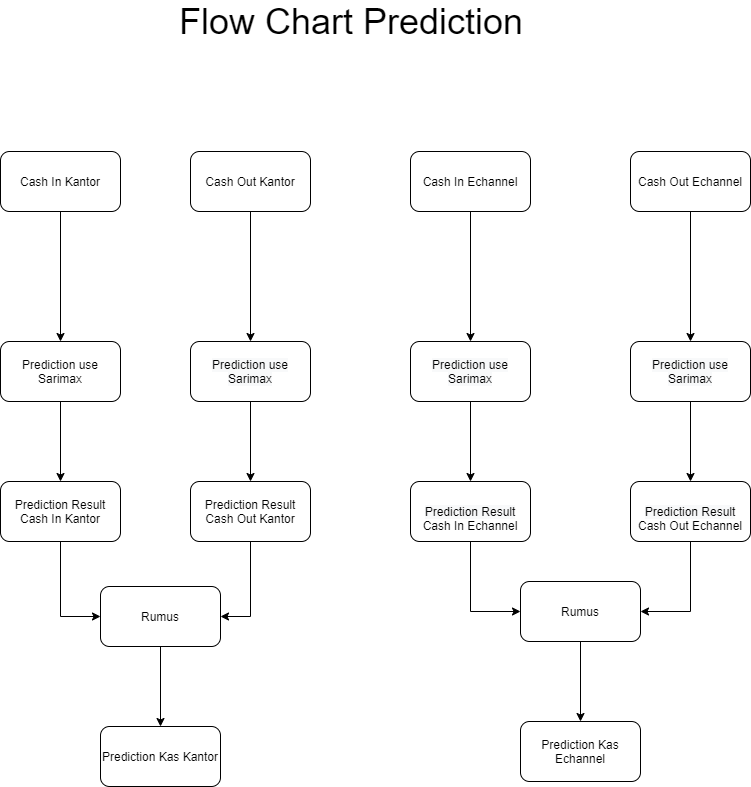

# Kantor

In [21]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Cash In Kantor

In [22]:
y_in_kantor = train['cash_in_kantor']

In [23]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [24]:
hasil = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(y_in_kantor,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            

            hasil[results.aic] =  str(param) + str(param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:23058.70204809172
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:22548.90153797584
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:22419.978567369708
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:21797.383095189274
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:22412.536036877653
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:22174.887346976837
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:21966.90720258871
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:21804.050097635787
ARIMA(0, 0, 1)x(0, 0, 0, 7)12 - AIC:22924.850774063874
ARIMA(0, 0, 1)x(0, 0, 1, 7)12 - AIC:22463.571120968154
ARIMA(0, 0, 1)x(0, 1, 0, 7)12 - AIC:623425.3833950262
ARIMA(0, 0, 1)x(0, 1, 1, 7)12 - AIC:21806.361231834944
ARIMA(0, 0, 1)x(1, 0, 0, 7)12 - AIC:22491.460016463265
ARIMA(0, 0, 1)x(1, 0, 1, 7)12 - AIC:22306.321547086827
ARIMA(0, 0, 1)x(1, 1, 0, 7)12 - AIC:21986.137000510957
ARIMA(0, 0, 1)x(1, 1, 1, 7)12 - AIC:21805.403350529523
ARIMA(0, 1, 0)x(0, 0, 0, 7)12 - AIC:23037.29862820708
ARIMA(0, 1, 0)x(0, 0, 1, 7)12 - AIC:22601.79291096718
ARIMA(0, 1, 0)x(

In [25]:
#hasil[min(hasil.keys())]

In [26]:
mod = sm.tsa.statespace.SARIMAX(y_in_kantor,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables)

[<class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>]


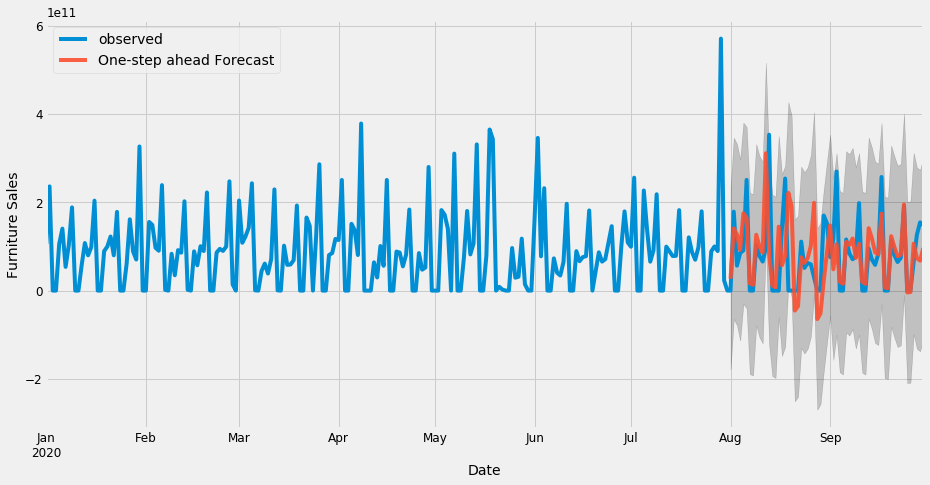

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_in_kantor['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

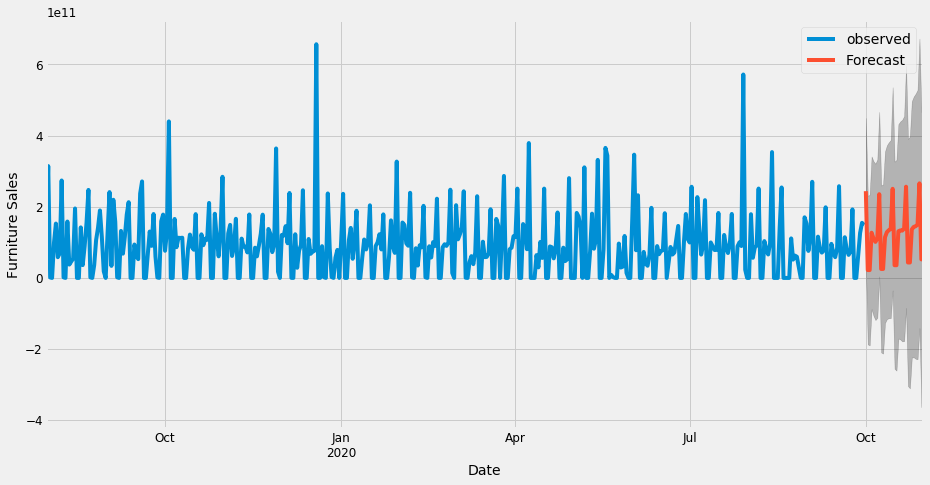

In [28]:
pred_uc = results.get_forecast(steps=31)
pred_ci = pred_uc.conf_int()

ax = y_in_kantor.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [29]:
pred_in_kantor = pred_uc.predicted_mean

## Cash out kantor

In [30]:
y_out_kantor = train['cash_out_kantor']

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [32]:
hasil = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(y_out_kantor,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            hasil[results.aic] =  str(param) + str(param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:22669.21910582653
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:22108.61840807046
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:21783.07283755646
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:21259.511242256496
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:21804.36745179222
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:21625.876512080737
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:21376.98176866467
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:21261.00227689213
ARIMA(0, 0, 1)x(0, 0, 0, 7)12 - AIC:22456.861962889943
ARIMA(0, 0, 1)x(0, 0, 1, 7)12 - AIC:21994.450715813793
ARIMA(0, 0, 1)x(0, 1, 0, 7)12 - AIC:21728.73007008093
ARIMA(0, 0, 1)x(0, 1, 1, 7)12 - AIC:21239.605947126056
ARIMA(0, 0, 1)x(1, 0, 0, 7)12 - AIC:21990.079398044476
ARIMA(0, 0, 1)x(1, 0, 1, 7)12 - AIC:21851.007737346685
ARIMA(0, 0, 1)x(1, 1, 0, 7)12 - AIC:21388.660227754815
ARIMA(0, 0, 1)x(1, 1, 1, 7)12 - AIC:21235.504991257603
ARIMA(0, 1, 0)x(0, 0, 0, 7)12 - AIC:22480.278818697097
ARIMA(0, 1, 0)x(0, 0, 1, 7)12 - AIC:22038.895409468663
ARIMA(0, 1, 0)x(0

In [33]:
hasil[min(hasil.keys())]

'(1, 0, 1)(0, 1, 1, 7)'

In [34]:
mod = sm.tsa.statespace.SARIMAX(y_out_kantor,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables)

[<class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>]


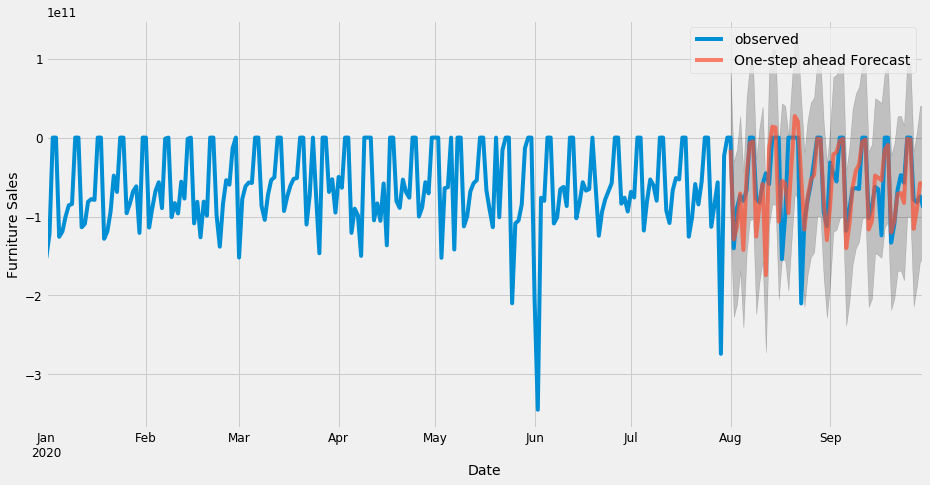

In [35]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_out_kantor['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

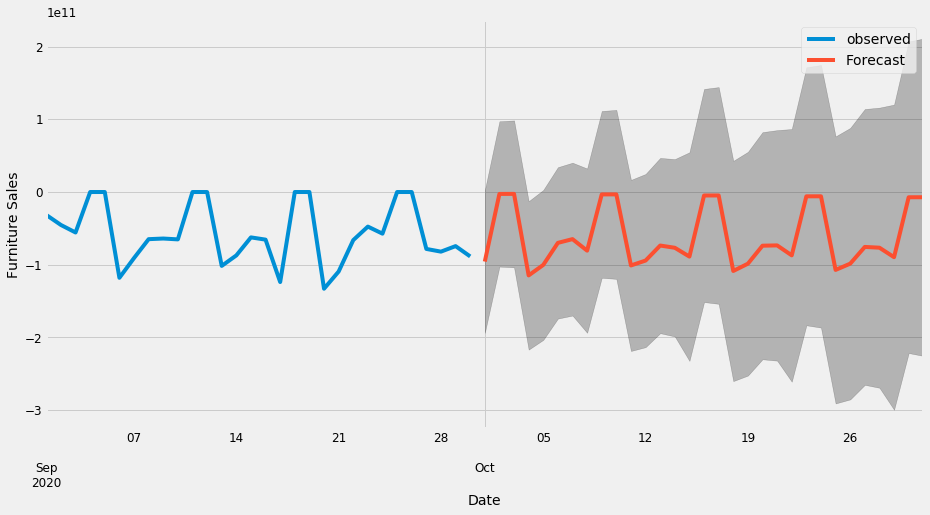

In [36]:
pred_uc = results.get_forecast(steps=31)
pred_ci = pred_uc.conf_int()

ax = y_out_kantor['2020-09'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [37]:
pred_out_kantor = pred_uc.predicted_mean

## Build all kantor

In [38]:
pred_kantor = pd.DataFrame()

In [39]:
pred_kantor['index'] = [i for i in range(31)]

In [40]:
pred_kantor['pred_in_kantor'] = pred_in_kantor.values
pred_kantor['pred_out_kantor']= pred_out_kantor.values

pred_kantor['in_out_kantor'] = pred_kantor['pred_in_kantor'] + pred_kantor['pred_out_kantor']

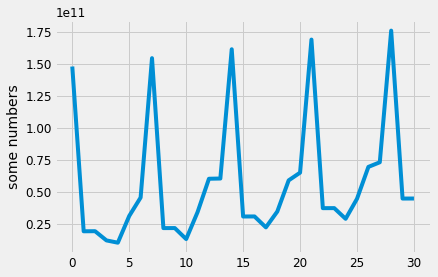

In [41]:
import matplotlib.pyplot as plt
plt.plot(pred_kantor['in_out_kantor'].values.tolist())
plt.ylabel('some numbers')
plt.show()

In [42]:
nilai_awal = train['kas_kantor'][-1]

sub_kantor = []
for i in pred_kantor['in_out_kantor'].values:
    nilai_awal = nilai_awal + i
    sub_kantor.append(nilai_awal)
    
    



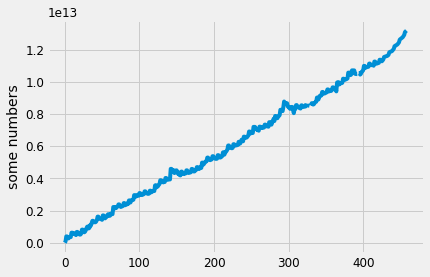

In [43]:
import matplotlib.pyplot as plt
plt.plot(train['kas_kantor'].values.tolist() + sub_kantor)
plt.ylabel('some numbers')
plt.show()

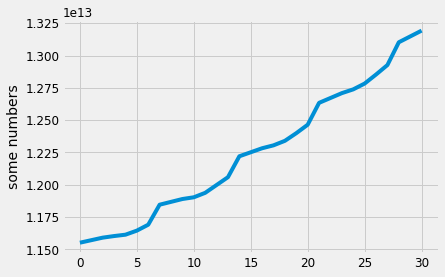

In [44]:
import matplotlib.pyplot as plt
plt.plot( sub_kantor)
plt.ylabel('some numbers')
plt.show()

# Echannel

## Cash in Echannel

In [45]:
y_in_echannel = train['cash_in_echannel']

In [46]:
hasil = {}
for season in range(7, 8):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                mod = sm.tsa.statespace.SARIMAX(y_in_echannel,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()

                print('ARIMA{}x{} {} - AIC:{}'.format(param, param_seasonal,season, results.aic))


                hasil[results.aic] =  str(param) + str(param_seasonal)
            except:
                continue


ARIMA(0, 0, 0)x(0, 0, 0, 7) 7 - AIC:18700.908107313477
ARIMA(0, 0, 0)x(0, 0, 1, 7) 7 - AIC:18205.97656921698
ARIMA(0, 0, 0)x(0, 1, 0, 7) 7 - AIC:17887.98033327087
ARIMA(0, 0, 0)x(0, 1, 1, 7) 7 - AIC:17423.728324169686
ARIMA(0, 0, 0)x(1, 0, 0, 7) 7 - AIC:17896.931933515887
ARIMA(0, 0, 0)x(1, 0, 1, 7) 7 - AIC:17718.116558814385
ARIMA(0, 0, 0)x(1, 1, 0, 7) 7 - AIC:17549.970463493446
ARIMA(0, 0, 0)x(1, 1, 1, 7) 7 - AIC:17425.69679166207
ARIMA(0, 0, 1)x(0, 0, 0, 7) 7 - AIC:18457.721458179774
ARIMA(0, 0, 1)x(0, 0, 1, 7) 7 - AIC:18087.027811570657
ARIMA(0, 0, 1)x(0, 1, 0, 7) 7 - AIC:17839.522198829796
ARIMA(0, 0, 1)x(0, 1, 1, 7) 7 - AIC:17400.984009916217
ARIMA(0, 0, 1)x(1, 0, 0, 7) 7 - AIC:18115.99936317403
ARIMA(0, 0, 1)x(1, 0, 1, 7) 7 - AIC:18000.36489859007
ARIMA(0, 0, 1)x(1, 1, 0, 7) 7 - AIC:17554.660114544888
ARIMA(0, 0, 1)x(1, 1, 1, 7) 7 - AIC:17402.836127547067
ARIMA(0, 1, 0)x(0, 0, 0, 7) 7 - AIC:18142.88160456811
ARIMA(0, 1, 0)x(0, 0, 1, 7) 7 - AIC:17837.44560117409
ARIMA(0, 1, 0)x(0

In [47]:
hasil[min(hasil.keys())]

'(1, 0, 1)(0, 1, 1, 7)'

In [48]:
mod = sm.tsa.statespace.SARIMAX(y_in_echannel,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables)

[<class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>]


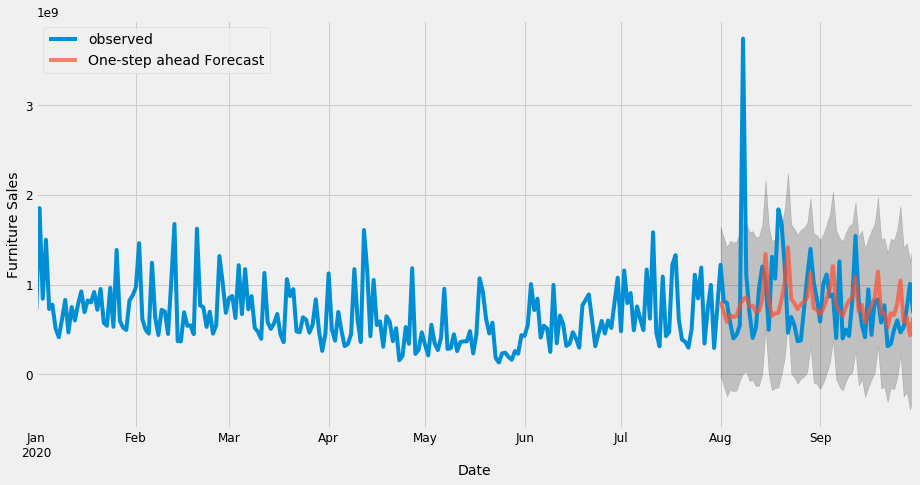

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_in_echannel['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

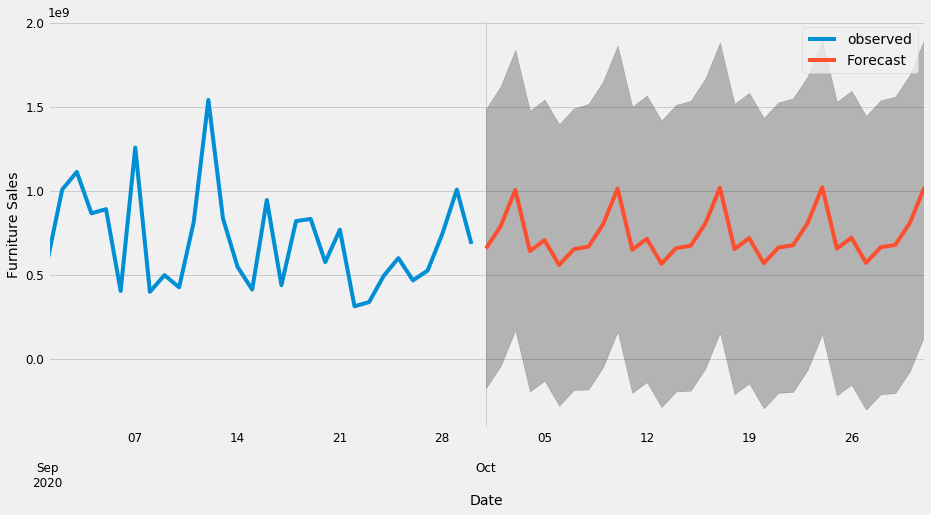

In [50]:
pred_uc = results.get_forecast(steps=31)
pred_ci = pred_uc.conf_int()

ax = y_in_echannel['2020-09'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [51]:
pred_ci['mean'] = (pred_ci['lower cash_in_echannel'] + pred_ci['upper cash_in_echannel'])/2


In [52]:
pred_ci['scale'] = np.median(pred_ci['mean'])
for i in range(len(pred_ci['mean'])):
    if pred_ci['mean'][i] > np.median(pred_ci['mean']):
        pred_ci['scale'][i] = pred_ci['mean'][i] + 0.25 * pred_ci['mean'][i]
    elif pred_ci['mean'][i] < np.median(pred_ci['mean']):
        pred_ci['scale'][i] = pred_ci['mean'][i] - 0.25 * pred_ci['mean'][i]


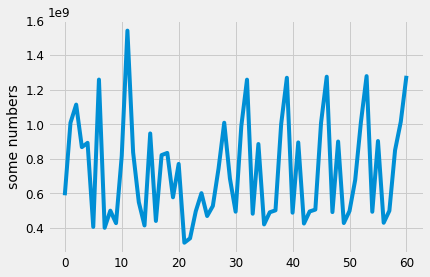

In [53]:
plt.plot(train['cash_in_echannel'].tolist()[-30:] + pred_ci['scale'].tolist())
plt.ylabel('some numbers')
plt.show()

In [54]:
pred_in_echannel = pred_ci['scale']

## Cash out echannel

In [55]:
import plotly.express as px

fig = px.line(train, x="periode", y="cash_out_echannel", title='Life expectancy in Canada')
fig.show()

In [56]:
y_out_echannel = train['cash_out_echannel']

In [57]:
hasil = {}
for season in range(7, 8):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                mod = sm.tsa.statespace.SARIMAX(y_out_echannel,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()

                print('ARIMA{}x{} {} - AIC:{}'.format(param, param_seasonal,season, results.aic))


                hasil[results.aic] =  str(param) + str(param_seasonal)
            except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 7) 7 - AIC:18710.154909876135
ARIMA(0, 0, 0)x(0, 0, 1, 7) 7 - AIC:18209.916498701004
ARIMA(0, 0, 0)x(0, 1, 0, 7) 7 - AIC:17875.7173903167
ARIMA(0, 0, 0)x(0, 1, 1, 7) 7 - AIC:17396.00433466489
ARIMA(0, 0, 0)x(1, 0, 0, 7) 7 - AIC:17888.88957342863
ARIMA(0, 0, 0)x(1, 0, 1, 7) 7 - AIC:17695.904538179988
ARIMA(0, 0, 0)x(1, 1, 0, 7) 7 - AIC:17535.459404477104
ARIMA(0, 0, 0)x(1, 1, 1, 7) 7 - AIC:17397.44782287776
ARIMA(0, 0, 1)x(0, 0, 0, 7) 7 - AIC:18478.74512961384
ARIMA(0, 0, 1)x(0, 0, 1, 7) 7 - AIC:18096.990178730044
ARIMA(0, 0, 1)x(0, 1, 0, 7) 7 - AIC:17829.214660356898
ARIMA(0, 0, 1)x(0, 1, 1, 7) 7 - AIC:17383.17947330277
ARIMA(0, 0, 1)x(1, 0, 0, 7) 7 - AIC:18118.56885272965
ARIMA(0, 0, 1)x(1, 0, 1, 7) 7 - AIC:18000.29065780428
ARIMA(0, 0, 1)x(1, 1, 0, 7) 7 - AIC:17540.30553180825
ARIMA(0, 0, 1)x(1, 1, 1, 7) 7 - AIC:17384.859633245083
ARIMA(0, 1, 0)x(0, 0, 0, 7) 7 - AIC:18258.57001865987
ARIMA(0, 1, 0)x(0, 0, 1, 7) 7 - AIC:17920.430197960053
ARIMA(0, 1, 0)x(0, 1,

In [58]:
hasil[min(hasil.keys())]

'(1, 0, 1)(0, 1, 1, 7)'

In [59]:
mod = sm.tsa.statespace.SARIMAX(y_out_echannel,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables)

[<class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>, <class 'statsmodels.iolib.table.SimpleTable'>]


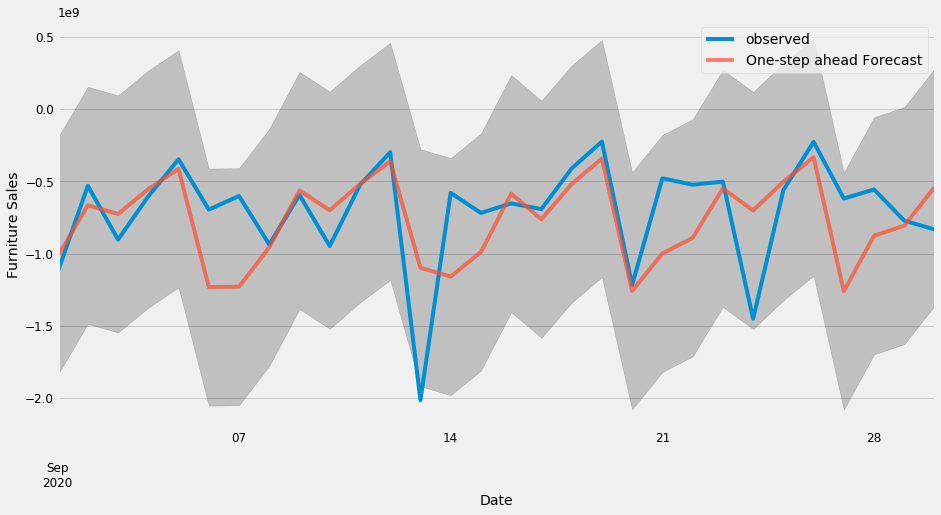

In [60]:
pred = results.get_prediction(start=pd.to_datetime('2020-09-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_out_echannel['2020-09':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

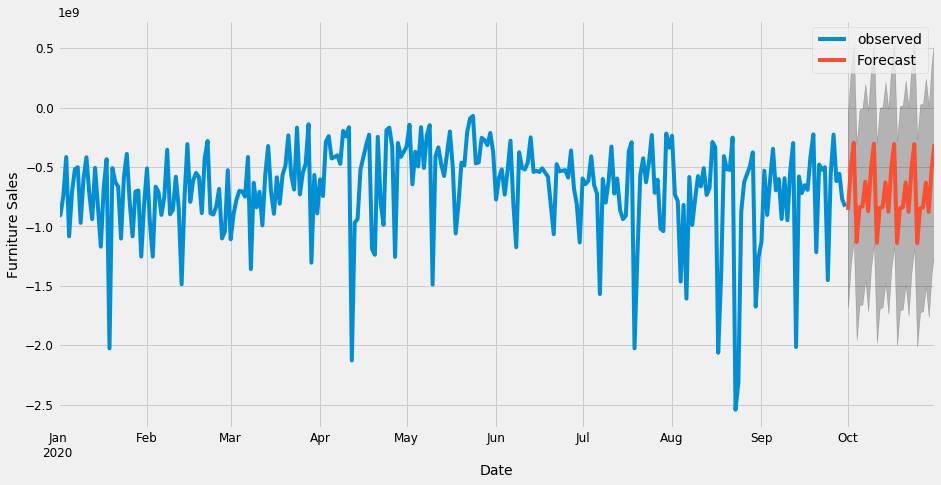

In [61]:
pred_uc = results.get_forecast(steps=31)
pred_ci = pred_uc.conf_int()

ax = y_out_echannel['2020'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [62]:
pred_ci['mean'] = (pred_ci['lower cash_out_echannel'] + pred_ci['upper cash_out_echannel'])/2


In [63]:
pred_ci['scale'] = np.median(pred_ci['mean'])
for i in range(len(pred_ci['mean'])):
    if pred_ci['mean'][i] > np.median(pred_ci['mean']):
        pred_ci['scale'][i] = pred_ci['mean'][i] + 0.35 * abs(pred_ci['mean'][i])
    elif pred_ci['mean'][i] < np.median(pred_ci['mean']):
        pred_ci['scale'][i] = pred_ci['mean'][i] - 0.35 * abs(pred_ci['mean'][i])


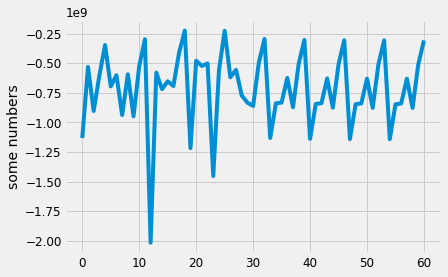

In [64]:
plt.plot(train['cash_out_echannel'].tolist()[-30:] + pred_ci['mean'].tolist())
plt.ylabel('some numbers')
plt.show()

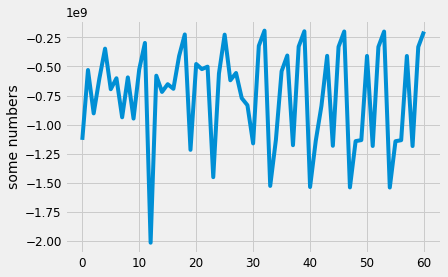

In [65]:
plt.plot(train['cash_out_echannel'].tolist()[-30:] + pred_ci['scale'].tolist())
plt.ylabel('some numbers')
plt.show()

In [66]:
pred_out_echannel = pred_ci['scale']

## Build all echannel

In [67]:
pred_echannel = pd.DataFrame()

pred_echannel['index'] = [i for i in range(31)]

pred_echannel['pred_in_echannel'] = pred_in_echannel.values.tolist()
pred_echannel['pred_out_echannel'] = pred_out_echannel.values.tolist()

In [68]:
pred_echannel['in_out_echannel'] = pred_echannel['pred_in_echannel'] +pred_echannel['pred_out_echannel']

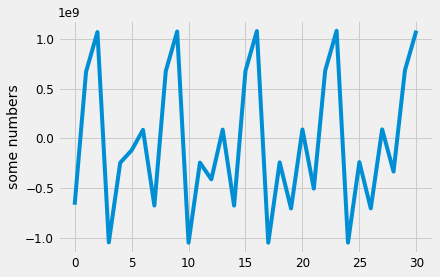

In [69]:
import matplotlib.pyplot as plt
plt.plot(pred_echannel['in_out_echannel'])
plt.ylabel('some numbers')
plt.show()

In [70]:
nilai_awal = train['kas_echannel'].tolist()[-1]

sub_echannel = []
for i in pred_echannel['in_out_echannel'].values:
    print(i)
    nilai_awal = nilai_awal + i
    sub_echannel.append(nilai_awal)
    
    



-667310869.2922447
667644283.884845
1067013525.3537745
-1044800611.0775387
-245083088.7069224
-120702408.24182057
85162669.47036278
-675032142.0701028
673170314.6392505
1072524057.269151
-1048384958.5172038
-244033138.86430788
-412189638.0509157
86989803.10936153
-675809614.7682602
677720528.4592218
1076852502.9199862
-1048185607.3721106
-241562327.9273386
-704871643.885154
88673405.12194657
-505469864.5657065
680749203.9852962
1079686594.7912803
-1047344814.5605848
-239556733.9444002
-704034803.7130396
89834284.41775537
-334161230.2813673
682603753.917065
1081408935.9551783


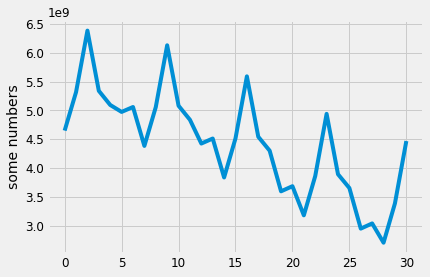

In [71]:
plt.plot(sub_echannel)
plt.ylabel('some numbers')
plt.show()

In [72]:
coba = sub_echannel[7:14]
coba = coba + sub_echannel[7:14] * 3
coba = coba + sub_echannel[7:10]
print(len(coba))

31


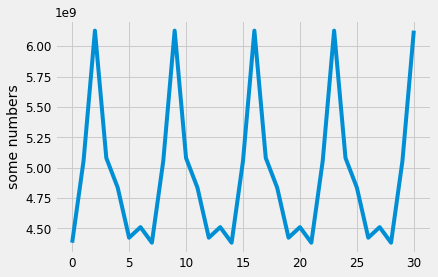

In [73]:
plt.plot(coba)
plt.ylabel('some numbers')
plt.show()

In [74]:
for i in range(len(coba)):
    coba[i] = coba[i] + 400000000
    

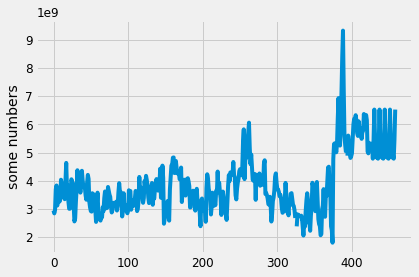

In [75]:
plt.plot( train['kas_echannel'].tolist() + coba)
plt.ylabel('some numbers')
plt.show()

## Build all kantor and echanel

In [76]:
submit = pd.read_csv('test.csv')

In [77]:
submit['value']=  sub_kantor + coba

In [78]:
submit.head()

index         value
0      0  1.155183e+13
1      1  1.157130e+13
2      2  1.159085e+13
3      3  1.160321e+13
4      4  1.161377e+13

In [79]:
submit.to_csv("best_data_lama_0.25_0.35_400000000.csv", index = False)